### Introduction 
The objective is to develop a time series model that predicts daily product sales in Favorita stores, incorporating variables such as promotions, oil prices and holidays.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


   CustomerID Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1   Male   19                  15                      39   
1           1   Male   19                  15                      39   
2           1   Male   19                  15                      39   
3           1   Male   19                  15                      39   
4           1   Male   19                  15                      39   

        Date  Sales  
0 2023-01-01  37.04  
1 2023-02-01  46.03  
2 2023-03-01  42.62  
3 2023-04-01  40.54  
4 2023-05-01  33.63  


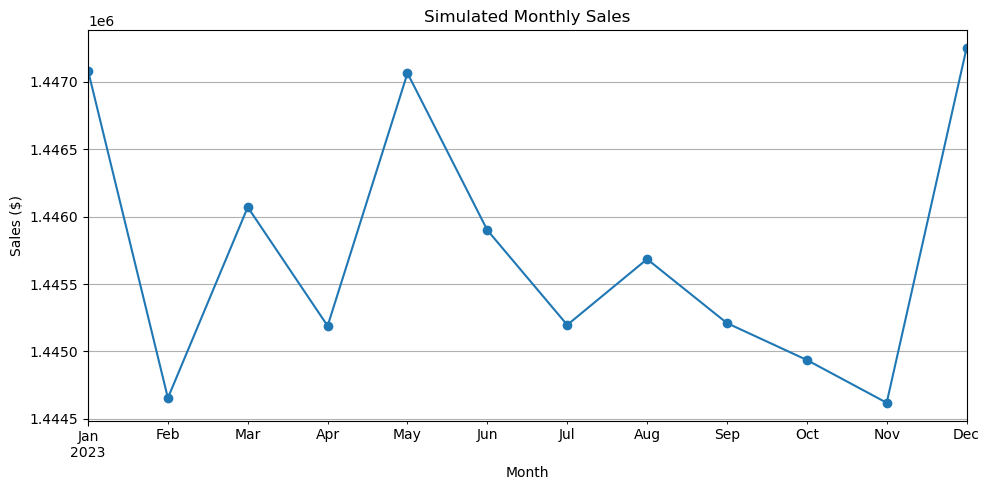

In [15]:

#Repeat each customer 12 times (one for each month)
df = df.loc[df.index.repeat(12)].reset_index(drop=True)

# Generate a date range from Jan 2023 to Dec 2023
dates = pd.date_range(start='2023-01-01', periods=12, freq='MS')  # MS = Month Start
df['Date'] = np.tile(dates, len(df) // 12)  # Repeat the month dates for each customer

#Simulate sales amount based on Spending Score with some randomness
np.random.seed(42)
df['Sales'] = df['Spending Score (1-100)'] * np.random.uniform(0.8, 1.2, size=len(df))
df['Sales'] = df['Sales'].round(2)

#Preview the simulated dataset
print(df.head())

#Aggregate sales by month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

#Plot the monthly sales
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o')
plt.title('Simulated Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Prepare the Data for Forecasting

In [30]:
sma = monthly_sales.rolling(window=3).mean()


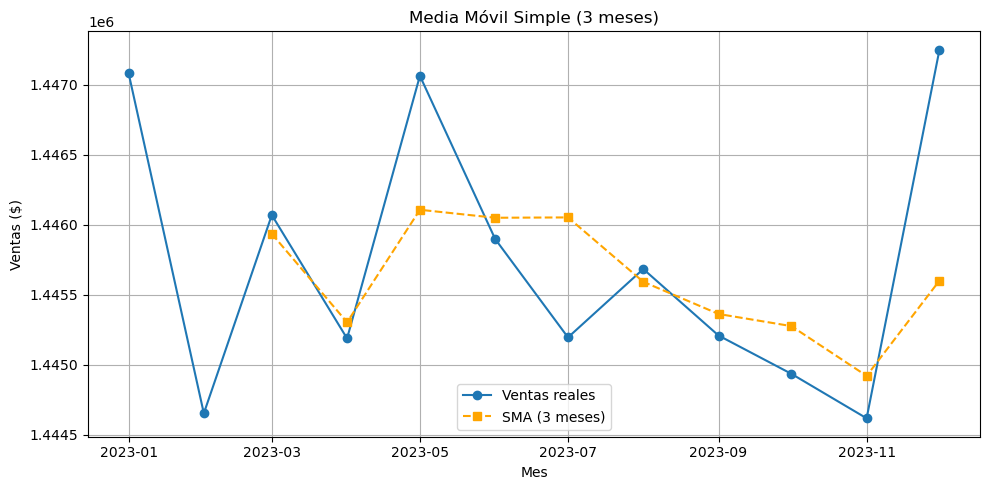

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label='Ventas reales', marker='o')
plt.plot(sma, label='SMA (3 meses)', linestyle='--', marker='s', color='orange')
plt.title('Media Móvil Simple (3 meses)')
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [44]:
# Use the last 3 actual sales values to forecast the next month
last_3 = monthly_sales[-3:]
forecast_next = last_3.mean()
print(f'Forecast for next month (January 2024): ${forecast_next:.2f}')



Forecast for next month (January 2024): $1445601.98


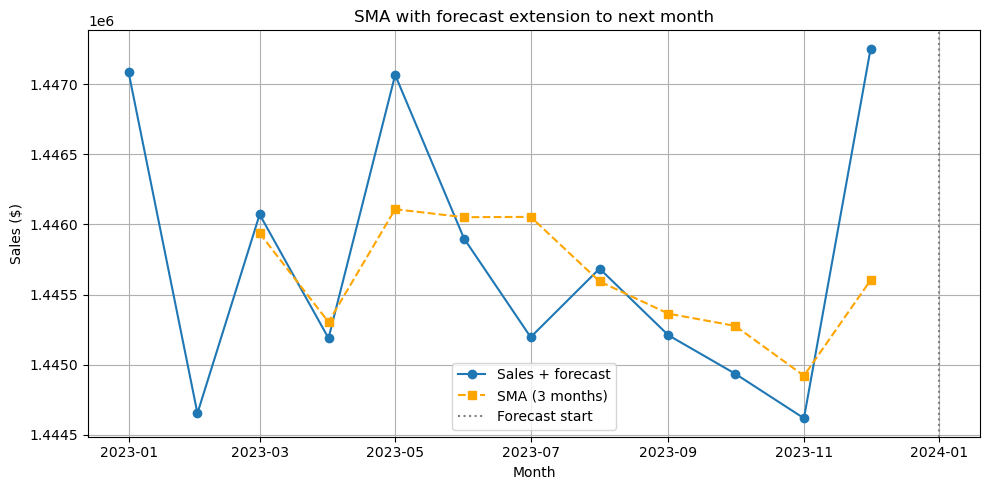

In [46]:
from datetime import datetime

#the predicted value
extended_series = monthly_sales.copy()
extended_series.index = pd.to_datetime(extended_series.index)

# Recalculate the SMA to include the new point
sma_extended = extended_series.rolling(window=3).mean()

plt.figure(figsize=(10, 5))
plt.plot(extended_series, label='Sales + forecast', marker='o')
plt.plot(sma_extended, label='SMA (3 months)', linestyle='--', marker='s', color='orange')
plt.axvline(x=datetime(2024, 1, 1), color='gray', linestyle=':', label='Forecast start')
plt.title('SMA with forecast extension to next month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [63]:
from sklearn.metrics import mean_absolute_error

# Suppose these are the actual values and the predicted values
real_values = monthly_sales[-3:].values  # Last 3 actual values
predicted_values = [forecast_next] * 3  # Repeat the forecast for the next 3 months

# Calculate MAE
mae = mean_absolute_error(real_values, predicted_values)
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Mean Absolute Error (MAE): 1099.67


In [61]:
average_sales = monthly_sales.mean()
print(f"Average sales: ${average_sales:.2f}")


Average sales: $1445738.29


### Conlusion
The forecasting model has delivered great results, with a **MAE** of **&#36;1099.67**. Given that the **average sales** are **&#36;1,445,738.29**, the error is only **0.08%**, which means the predictions are quite accurate. This shows that the model is performing well and can be useful for making more informed sales decisions.
